In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [15]:

df = pd.read_csv("./twitter_sentiment.csv", header=None, index_col = 0 )

In [16]:
df.sample(5)

,1,2,3
0,,,
10535,RedDeadRedemption(RDR),Irrelevant,"Great list, but very disappointed that nobody ..."
1813,CallOfDutyBlackopsColdWar,Irrelevant,Ws from the chat.
10456,RedDeadRedemption(RDR),Positive,"Wow, that's good."
3750,Cyberpunk2077,Neutral,Cyberpunk Online won’t support VR since “it’s ...
5207,Hearthstone,Negative,Never cracked the ice block


In [17]:
df = df[[2,3]].reset_index(drop=True)

In [21]:
df.sample(5)

,2,3
33845,Negative,Fortnite really copyed the superior battle tec...
56190,Neutral,Absolutely love my amazing sister who has made...
16870,Positive,I am 100 % most people def gonna buy this fuck...
61519,Neutral,Check out Googliman Car Mods' first upload to ...
49035,Negative,"Woke up early, drank my coffee. Might just go ..."


In [22]:
df.columns = ["sentiment","text"]

In [23]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [25]:
# check missing values
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [26]:
# remove missing values
df.dropna(inplace=True)

In [29]:
sum(df["text"].apply(len) > 5) , sum(df["text"].apply(len) < 5) 

(72883, 1773)

In [30]:
print(df.shape)
df = df[df["text"].apply(len) > 5 ]
print(df.shape)

(74996, 2)
(72883, 2)


In [31]:
df["sentiment"].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

###  Preprocess kgptalkie

In [32]:
df = ps.get_basic_features(df)

In [35]:
df.sample(5)

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
27104,Neutral,it's okay. when are we going to force men to h...,80,24,3.333333,14,0,0,2,0
17278,Neutral,2017 LMAO WTF,11,3,3.666667,0,0,0,1,2
49249,Irrelevant,Former Arsenal and West Ham player Alex Song h...,217,47,4.617021,21,0,0,3,2
48729,Positive,As much as I don’t like the Amazon product mod...,199,43,4.627907,17,0,4,2,2
21671,Negative,im sorry but valorant looks such an exact flip...,112,23,4.869565,9,0,0,0,0


### Virtualization

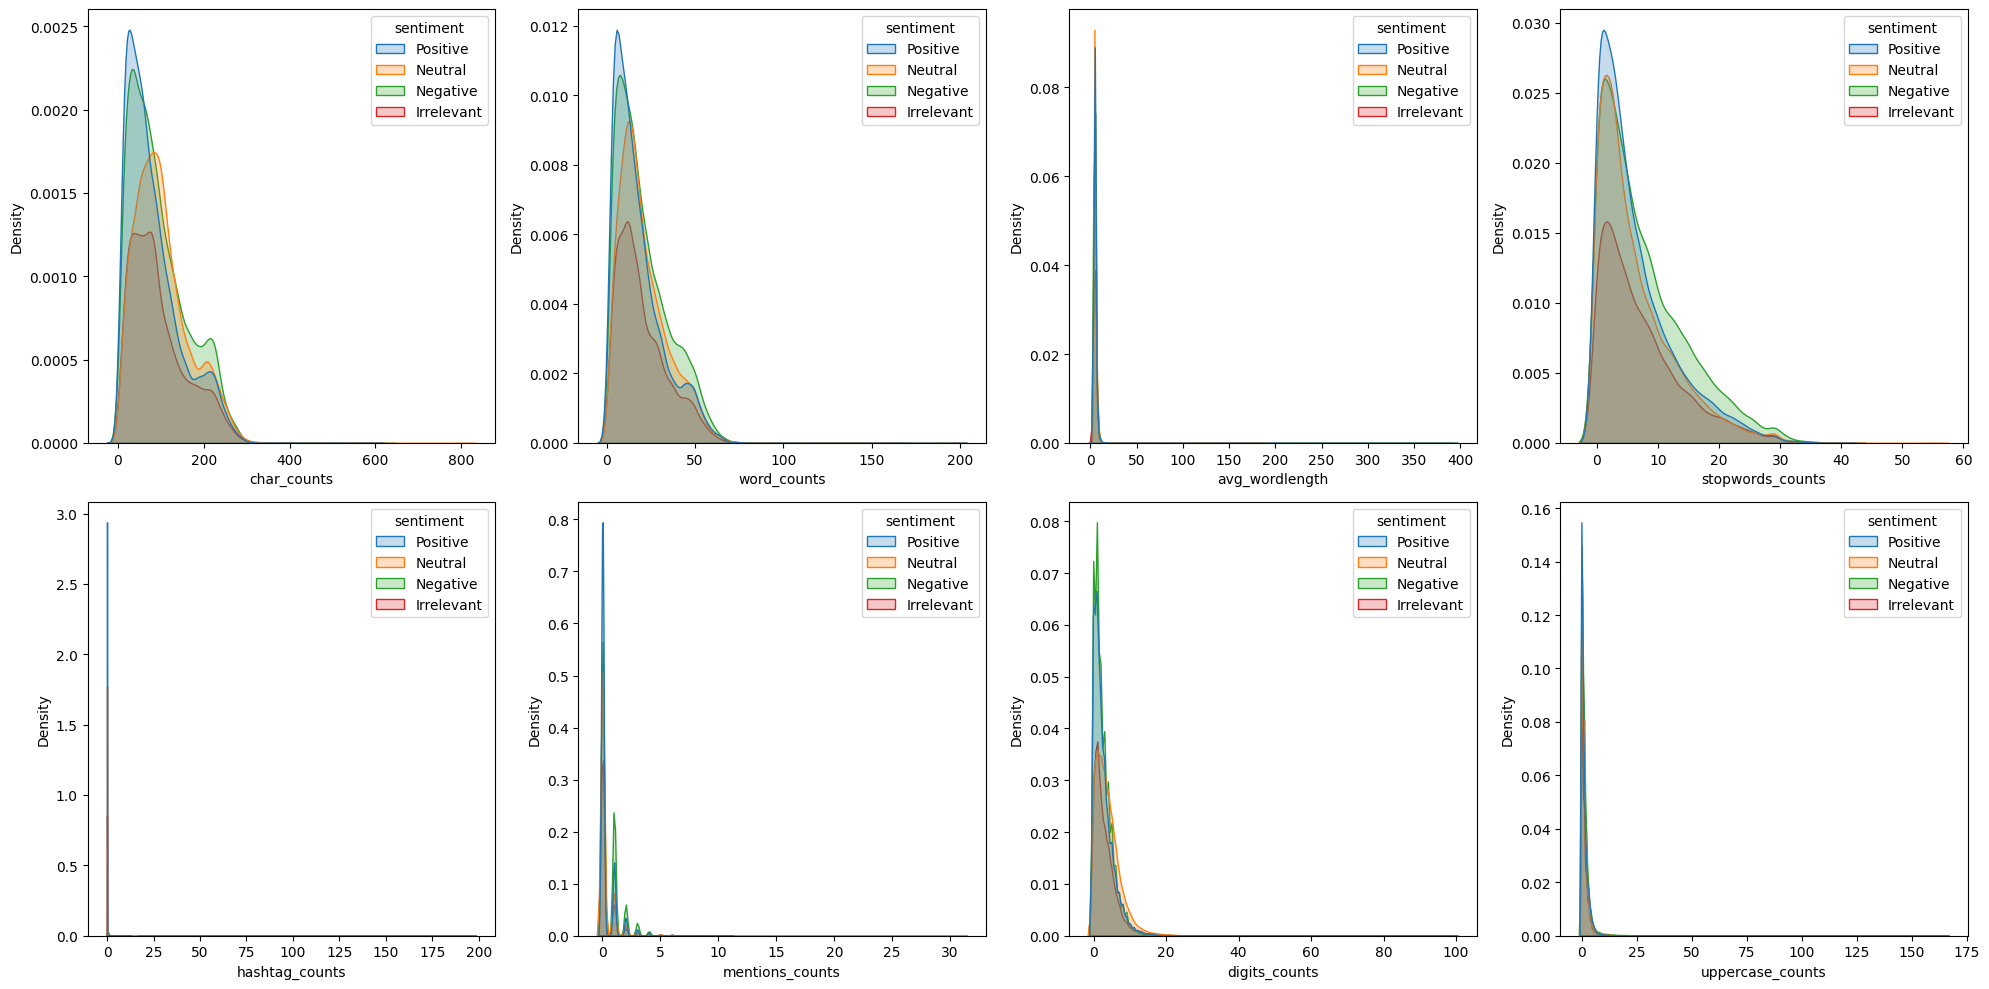

In [44]:
import seaborn as sns

plt.figure(figsize=(20,10))
num_cols = df.select_dtypes(include="number").columns

for index , col in enumerate(num_cols):
    
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=True)


plt.tight_layout()
plt.show()
